## Unicorn Investors wants to make an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! The investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [0]:
train=pd.read_csv("Train_SU63ISt.csv") 
test=pd.read_csv("Test_0qrQsBZ.csv")

In [0]:
#Let’s make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

train_original=train.copy() 
test_original=test.copy()

In [0]:
print("Datatypes of train file : \n", train_original.dtypes)
print("\nDatatypes of test file : \n", test_original.dtypes)

Datatypes of train file : 
 ID           int64
Datetime    object
Count        int64
dtype: object

Datatypes of test file : 
 ID           int64
Datetime    object
dtype: object


In [0]:
print("Shape of train set : ",train_original.shape)
print("Shape of test set : ",test_original.shape)

Shape of train set :  (18288, 3)
Shape of test set :  (5112, 2)


In [0]:
#We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object.
#So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')

train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M')

In [0]:
train_original.iloc[5].Datetime.month

8

In [0]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [0]:
train_original

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4
...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22


In [0]:
train['Day of week'] = train['Datetime'].dt.dayofweek
temp = train['Datetime']


#In above code, we have created a new column and inserted 'dayofweek' which will insert integer values according to the date.
#The days in 'dayofweek' range from 0 to 6,(i.e) Monday to Sunday.

In [0]:
#Pandas.apply allow the users to pass a function and apply it on every single value of the Pandas series. 

def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
      return 1
    else:
      return 0
temp2 = train['Datetime'].apply(applyer)
train['weekend'] = temp2

train

,ID,Datetime,Count,year,month,day,Hour,Day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1
...,...,...,...,...,...,...,...,...,...
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0


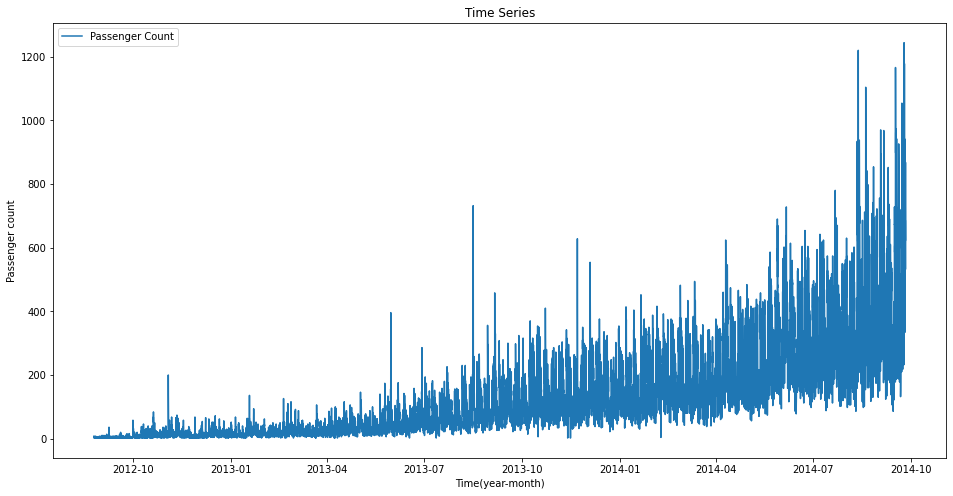

In [0]:
train.index = train['Datetime']
ts = train['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')
plt.show()

### Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

## Hypotheses


### 1.   Traffic will increase as the years pass by
### 2.   Traffic will be high from May to October
### 3.   Traffic on weekdays will be more
### 4.   Traffic during the peak hours will be high




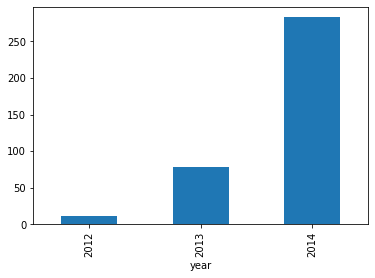

In [0]:
# 1)Traffic will increase as the years pass by
train.groupby('year')['Count'].mean().plot.bar()

# groupby groups all the values under given attribute

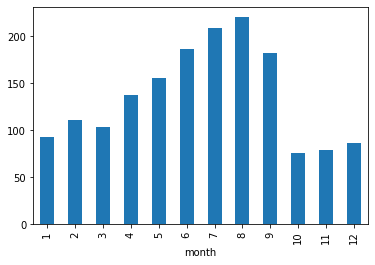

In [0]:
# 2)Traffic will be high from May to October
train.groupby('month')['Count'].mean().plot.bar()


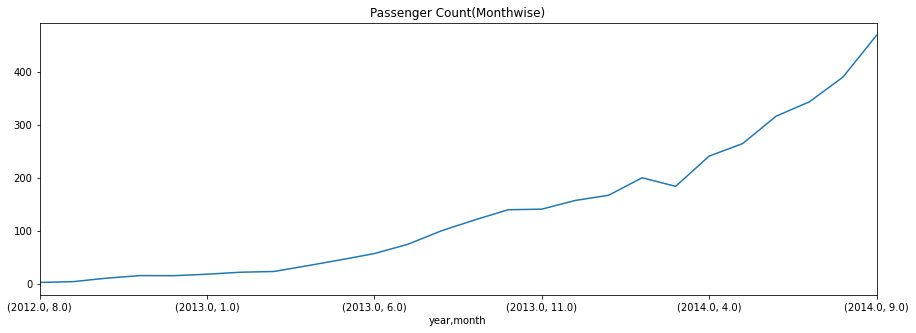

In [0]:
temp =  train.groupby(['year','month'])['Count'].mean()

temp.plot(figsize=(15,5),title='Passenger Count(Monthwise)')

plt.show()

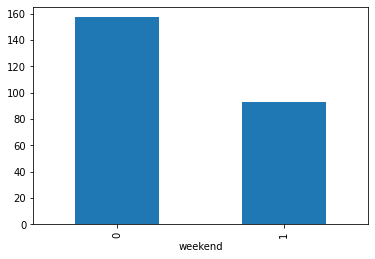

In [0]:
# 3)Traffic on weekdays will be more
train.groupby('weekend')['Count'].mean().plot.bar()

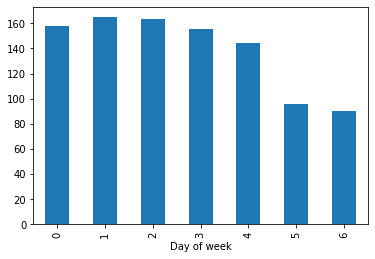

In [0]:
train.groupby('Day of week')['Count'].mean().plot.bar()

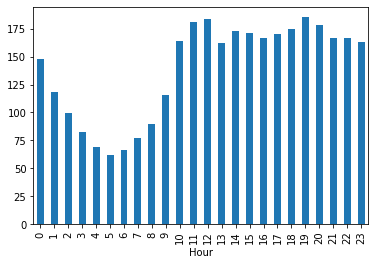

In [0]:
# 4)Traffic during the peak hours will be high
train.groupby('Hour')['Count'].mean().plot.bar()

In [0]:
# Dropping the ID as it has no use with passenger count

train = train.drop('ID',1)

### As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [0]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
#Hourly Timeseries
hourly = train.resample('H').mean() #Hourly mean of each year
#Daily Timeseries
daily = train.resample('D').mean()  #Daily mean of each year
# Converting to weekly mean 
weekly = train.resample('W').mean() #Weekly mean of each year
# Converting to monthly mean 
monthly = train.resample('M').mean()#Monthly mean of each year

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

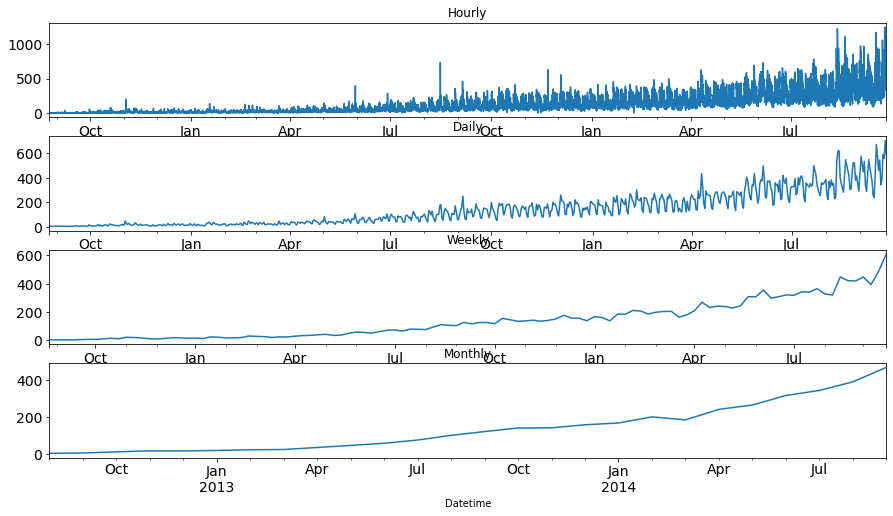

In [0]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3])

plt.show()

### We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.


### But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.

In [0]:
# Converting to daily mean 
test = test.resample('D').mean() 

In [0]:
# Converting to daily mean 
train = train.resample('D').mean()

In [0]:
train

,Count,year,month,day,Hour,Day of week,weekend
Datetime,,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0,1.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0,1.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0,0.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0,0.0
...,...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0,1.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0,0.0
